In [0]:
import pandas as pd
digits = pd.read_csv('https://github.com/avneeshjain/ml-datasets/blob/master/mnist_784.csv?raw=true')

In [4]:
digits.shape

(50000, 785)

In [0]:
px_rng = range(300,400)
cols = ['pixel%d'%i for i in px_rng]
digits.loc[0:4, cols]

,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,...,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,253,243,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,198,254,56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,159,254,85,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,225,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,22


In [0]:
y = digits['class']
cols = ['pixel%d'%i for i in range(1,785)]
X = digits[cols]

In [0]:
%matplotlib notebook

/home/avneesh/.virtualenvs/data-analytics/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


<IPython.core.display.Javascript object>


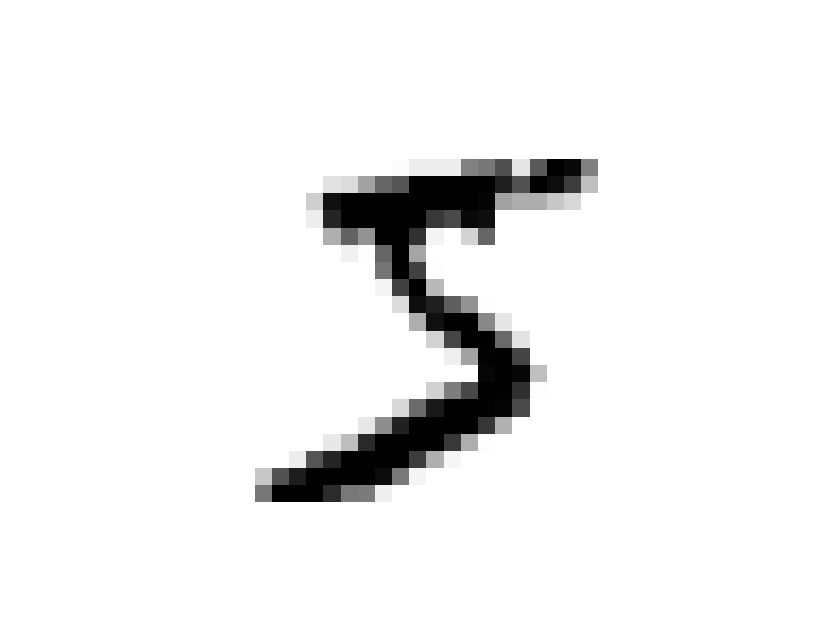

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [0]:
X_train, X_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y[:60000], y[60000:]

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
model = LogisticRegression(penalty='l1', solver='saga', tol=0.001, max_iter=1000)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [0]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))

/home/avneesh/.virtualenvs/data-analytics/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.9129


In [0]:
from sklearn.cluster import KMeans
n_clusters = len(np.unique(y_train))
clf = KMeans(n_clusters = n_clusters, init='random')
clf.fit(X_train)
clabels = clf.predict(X_train)

In [0]:
pd.Series(clabels).value_counts()

5    8933
2    8840
9    7455
0    6539
1    5967
6    5718
3    5606
8    4684
4    3167
7    3091
dtype: int64

In [0]:
cluster_map = dict(zip(range(0,10), list('ABCDEFGHIJ')))
convert_to_text_labels = np.vectorize(lambda x: cluster_map[x])
text_labels = convert_to_text_labels(clabels)
df = pd.DataFrame({'digit':y_train, 'clabel':text_labels})
result = df.groupby('clabel').apply(lambda x: x['digit'].value_counts())

In [0]:
result.loc['A']

1    2977
5     809
8     422
2     354
4     314
7     287
6     229
9     118
3     109
0      21
Name: digit, dtype: int64

In [0]:
result.loc['B']

2    4189
3     215
6      84
8      55
7      38
4      36
0      17
5      14
9      12
1       9
Name: digit, dtype: int64

In [0]:
result.loc['C']

1    3718
3     425
2     362
7     326
8     297
6     269
9     240
5     162
4     159
0       3
Name: digit, dtype: int64

In [0]:
result.loc['D']

8    3462
5    1486
3    1035
0     177
2     158
6      90
9      69
4      20
7      11
1      10
Name: digit, dtype: int64

In [0]:
result.loc['E']

0    2809
6      98
5      62
9      38
8      38
3      16
7      15
4      10
2      10
Name: digit, dtype: int64

In [0]:
result.loc['F']

7    3773
9    2465
4    1937
5     347
8     178
2      70
3      48
0      14
1       9
6       1
Name: digit, dtype: int64

In [0]:
result.loc['G']

3    3926
5    1768
8    1124
2     330
0     162
9      84
6      29
7       5
1       5
4       1
Name: digit, dtype: int64

In [0]:
result.loc['H']

0    2500
5     274
3     127
6     122
2     101
8      32
9      19
7      15
4      12
Name: digit, dtype: int64

In [0]:
result.loc['I']

4    3186
9    2896
7    1791
5     377
8     196
3     175
2     172
6      82
0      38
1       6
Name: digit, dtype: int64